The purpose of this notebook is to **explore, understand, and preprocess** the dataset — preparing a clean version suitable for **machine learning modeling** in the next phase.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dff = pd.read_csv("../data/raw/BRFSS-2015.csv")

#### Important Risk Factors
Selecting the following  **important risk factors** for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

*   blood pressure (high)
*   cholesterol (high)
*   smoking
*   diabetes
*   age
*   sex
*   race
*   diet
*   exercise
*   alcohol consumption
*   BMI
*   Household Income
*   Marital Status
*   Sleep
*   Time since last checkup
*   Education
*   Health care coverage
*   Mental Health

#### I consulted the codebook for what each column / question is to understand which column to select and how to clean the data here  [https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf).
 Then I selected those relevant to diabetes 

In [3]:
# columns in dataset  that are important risk factors of diabetes
diabetes_factors = ["DIABETE3","_RFHYPE5","TOLDHI2","_CHOLCHK","_BMI5","SMOKE100",
                    "CVDSTRK3", "_MICHD","_TOTINDA","_FRTLT1", "_VEGLT1", "_RFDRHV5",
                    "HLTHPLN1","MEDCOST","GENHLTH","MENTHLTH","PHYSHLTH","DIFFWALK","SEX",
                    "_AGEG5YR","EDUCA", "INCOME2"]

In [4]:
# working on a copy of selected columns
df = dff.loc[:, diabetes_factors].copy()
print(f"Shape :{df.shape}")
df.head()

Shape :(441456, 22)


,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [5]:
# renaming columns for better readability
df.rename(mapper={"DIABETE3":"Diabetes","_RFHYPE5":"HighBp","TOLDHI2":"HighCholesterol",
                  "_CHOLCHK":"CheckedCholesterol","_BMI5":"BMI","SMOKE100":"Smoke100",
                  "CVDSTRK3":"Stroke","_MICHD":"HeartDisease","_TOTINDA":"PhysicalActivity",
                  "_FRTLT1":"Fruits","_VEGLT1":"Vegetables","_RFDRHV5":"HeavyDrinking",
                  "HLTHPLN1":"HealthCareAccess","MEDCOST":"MedicalCost","GENHLTH":"GeneralHealth",
                  "MENTHLTH":"MentalHealth","PHYSHLTH":"PhysicalHealth","DIFFWALK":"DifficultyWalking",
                  "SEX":"Sex","_AGEG5YR":"Age","EDUCA":"Education","INCOME2":"Income"},axis=1,inplace=True)
df.head()

,Diabetes,HighBp,HighCholesterol,CheckedCholesterol,BMI,Smoke100,Stroke,HeartDisease,PhysicalActivity,Fruits,...,HealthCareAccess,MedicalCost,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Education,Income
0,3.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,1.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,1.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,1.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [6]:
df.tail()

,Diabetes,HighBp,HighCholesterol,CheckedCholesterol,BMI,Smoke100,Stroke,HeartDisease,PhysicalActivity,Fruits,...,HealthCareAccess,MedicalCost,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Education,Income
441451,1.0,2.0,1.0,1.0,1842.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,4.0,88.0,88.0,1.0,2.0,11.0,2.0,4.0
441452,3.0,1.0,2.0,1.0,2834.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,88.0,88.0,2.0,2.0,2.0,5.0,2.0
441453,3.0,2.0,1.0,1.0,4110.0,1.0,2.0,2.0,9.0,9.0,...,1.0,2.0,4.0,20.0,88.0,2.0,2.0,11.0,4.0,5.0
441454,3.0,2.0,2.0,1.0,2315.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,3.0,88.0,88.0,2.0,1.0,7.0,5.0,1.0
441455,1.0,2.0,1.0,1.0,2469.0,2.0,2.0,1.0,1.0,1.0,...,1.0,2.0,2.0,88.0,88.0,2.0,2.0,9.0,6.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Diabetes            441449 non-null  float64
 1   HighBp              441456 non-null  float64
 2   HighCholesterol     382302 non-null  float64
 3   CheckedCholesterol  441456 non-null  float64
 4   BMI                 405058 non-null  float64
 5   Smoke100            427201 non-null  float64
 6   Stroke              441456 non-null  float64
 7   HeartDisease        437514 non-null  float64
 8   PhysicalActivity    441456 non-null  float64
 9   Fruits              441456 non-null  float64
 10  Vegetables          441456 non-null  float64
 11  HeavyDrinking       441456 non-null  float64
 12  HealthCareAccess    441456 non-null  float64
 13  MedicalCost         441455 non-null  float64
 14  GeneralHealth       441454 non-null  float64
 15  MentalHealth        441456 non-nul

Dataset is currently in correct datatype and some nul values are present

In [8]:
# defined codes in the dataset that represent missing values from the codebook
missing_codes = {
    "Diabetes": [7,9],
    "HighBp": [9],
    "HighCholesterol": [7,9],
    "CheckedCholesterol": [9],
    "Smoke100": [7,9],
    "Stroke": [7,9],
    "PhysicalActivity": [9],
    "Fruits": [9],
    "Vegetables": [9],
    "HeavyDrinking": [9],
    "HealthCareAccess": [7,9],
    "MedicalCost": [7,9],
    "GeneralHealth": [7,9],
    "MentalHealth": [77,99],
    "PhysicalHealth": [77,99],
    "DifficultyWalking": [7,9],
    "Age": [14],
    "Education": [9],
    "Income": [77,99]
}

In [9]:
for col, codes in missing_codes.items():
    df[col] = df[col].replace({c:np.nan for c in codes})

In [10]:
# total number of null values in each column
df.isnull().sum()

Diabetes                798
HighBp                 1367
HighCholesterol       62715
CheckedCholesterol    15337
BMI                   36398
Smoke100              17549
Stroke                 1290
HeartDisease           3942
PhysicalActivity      37992
Fruits                43711
Vegetables            51117
HeavyDrinking         25733
HealthCareAccess       1840
MedicalCost            1194
GeneralHealth          1247
MentalHealth           7408
PhysicalHealth         9743
DifficultyWalking     14594
Sex                       0
Age                    5336
Education              1811
Income                79505
dtype: int64

In [11]:
# percentage of mising values in each columns 
numrows,_ = df.shape
printout = []
max_index_length = max(len(str(index)) for index in df.isnull().sum().index)+4
print(f"Percentage of missing values by columns")
for key,value in df.isnull().sum().items():
    printout.append(f"{str(key).ljust(max_index_length)}: {round((value/numrows)*100,ndigits=2)}%")
print("\n".join(printout))

Percentage of missing values by columns
Diabetes              : 0.18%
HighBp                : 0.31%
HighCholesterol       : 14.21%
CheckedCholesterol    : 3.47%
BMI                   : 8.24%
Smoke100              : 3.98%
Stroke                : 0.29%
HeartDisease          : 0.89%
PhysicalActivity      : 8.61%
Fruits                : 9.9%
Vegetables            : 11.58%
HeavyDrinking         : 5.83%
HealthCareAccess      : 0.42%
MedicalCost           : 0.27%
GeneralHealth         : 0.28%
MentalHealth          : 1.68%
PhysicalHealth        : 2.21%
DifficultyWalking     : 3.31%
Sex                   : 0.0%
Age                   : 1.21%
Education             : 0.41%
Income                : 18.01%


since missing values by column is not >75% no column would be dropped 

In [12]:
# converting BMI to float and scaling it down by 100 to get actual BMI values
df["BMI"] = (df["BMI"].astype('float').div(100)).round(2)

In [13]:
# Replacing 88 (not applicable) with 0 in MentalHealth and PhysicalHealth columns
df["MentalHealth"] = df["MentalHealth"].replace({88:0})
df["PhysicalHealth"] = df["PhysicalHealth"].replace({88:0})

In [14]:
# seperating dataframe  by datatype (numeric and categorical)
numeric_col = ["BMI"]
categorical_col = ["Diabetes","HighBp","HighCholesterol","CheckedCholesterol","Smoke100",
                   "Stroke","HeartDisease","PhysicalActivity","Fruits","Vegetables","HeavyDrinking",
                   "HealthCareAccess","MedicalCost","GeneralHealth","MentalHealth","PhysicalHealth",
                   "DifficultyWalking","Sex","Age","Education","Income"]

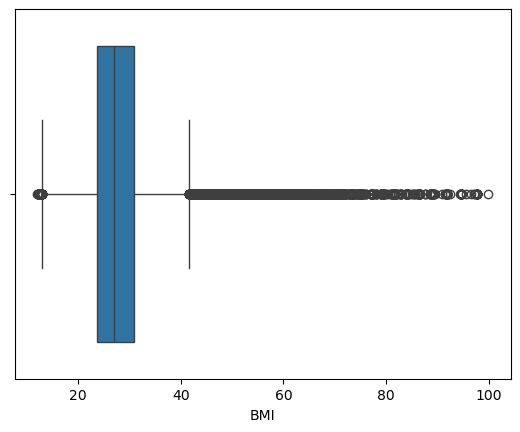

In [15]:
# outlier detection in BMI  column
sns.boxplot(data=df,x="BMI")
plt.show()

In [16]:
def outlier_limits(column):
    q1,q3 = np.nanpercentile(df[f"{column}"],(25,75))
    iqr = q3-q1     #interquartile range 
    lower_boundary = q1 - 1.5*iqr
    upper_boundary = q3 + 1.5*iqr
    return lower_boundary,upper_boundary

In [17]:
ll,ul = outlier_limits("BMI")
print(f"Upper Boundary :{round(ul,1)}")
print(f"Lower Boundary :{round(ll,1)}")
# percentage of BMI outliers 
bmi_outliers = []
for i in df["BMI"]:
    if i >ul:
        bmi_outliers.append(i)
    elif i < ll:
        bmi_outliers.append(i)
bmi_percent_outliers = (len(bmi_outliers)/numrows)*100
print(f"Percentge of BMI outliers : {round(bmi_percent_outliers,2)}%")
print(f"Maximum BMI :{round(df["BMI"].max(),1)}")
print(f"Minimum BMI :{round(df["BMI"].min(),1)}")

Upper Boundary :41.7
Lower Boundary :13.0
Percentge of BMI outliers : 3.11%
Maximum BMI :100.0
Minimum BMI :12.0


replacing null values by median and outliers by respective  closest boundary

In [18]:
# replacing outliers first 
df["BMI"] = np.where(df["BMI"]>ul,ul,df["BMI"])
df["BMI"] = np.where(df["BMI"]<ll,ll,df["BMI"])

In [19]:
# imputing median values for missing BMI
bmi_median = df["BMI"].median()
df["BMI"] = np.where(df["BMI"].isnull(),bmi_median,df["BMI"])

In [20]:
# imputing mode values for categorical column
for data in categorical_col:
    df[data] = np.where(df[data].isnull(),df[data].mode(),df[data])

In [21]:
# checking for duplicates 
df.duplicated().value_counts()

False    426302
True      15154
Name: count, dtype: int64

In [22]:
# removing duplicates to prevent data leakage and ensure data integrity
df.drop_duplicates(inplace=True)

In [23]:
# mapping categorical encodings consistently across columns
# Reversing  the  ordinal scale of GeneralHealth for consistency:
df["GeneralHealth"] = df["GeneralHealth"].map({1:5,2:4,3:3,4:2,5:1})

In [24]:
#  Binary encoding for categorical variables
df["DifficultyWalking"] = df["DifficultyWalking"].replace({1:1,2:0})
df["Sex"] = df["Sex"].replace({1:1,2:0})
df["HeavyDrinking"] = df["HeavyDrinking"].replace({1:0,2:1})
df["HealthCareAccess"] = df["HealthCareAccess"].replace({1:1,2:0})
df["MedicalCost"] = df["MedicalCost"].replace({1:1,2:0})
df["PhysicalActivity"] = df["PhysicalActivity"].replace({1:1,2:0})
df["Fruits"] = df["Fruits"].replace({1:1,2:0})
df["Vegetables"] = df["Vegetables"].replace({1:1,2:0})
df["Smoke100"] = df["Smoke100"].replace({1:1,2:0})
df["Stroke"] = df["Stroke"].replace({1:1,2:0})
df["HeartDisease"] = df["HeartDisease"].replace({1:1,2:0})
df["HighBp"] = df["HighBp"].replace({1:0,2:1})
df["HighCholesterol"] = df["HighCholesterol"].replace({2:0,1:1})
df["CheckedCholesterol"] = df["CheckedCholesterol"].replace({1:1,2:0})


In [25]:
# Diabetes: my decision policy on pre-diabetes (4)
# 1 and 2 :  (Diabetes), 3: (No Diabetes), 4: (Pre-diabetes/ borderline)->treated as Yes, so encoding 1,2,4 as 1 and 3 as 0
df["Diabetes"] = df["Diabetes"].replace({1:1,2:1,3:0,4:1})

In [26]:
df = df.copy()
# checking the distribution of target variable after cleaning
df.groupby("Diabetes").size()

Diabetes
0.0    358030
1.0     68272
dtype: int64

#### Cleaned data is biased with non diabetes more than diabetes 

In [27]:
# lets see the cleaned data
df.head()

,Diabetes,HighBp,HighCholesterol,CheckedCholesterol,BMI,Smoke100,Stroke,HeartDisease,PhysicalActivity,Fruits,...,HealthCareAccess,MedicalCost,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.18,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.09,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,0.0,1.0,1.0,22.04,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,15.0,0.0,0.0,11.0,4.0,8.0
3,0.0,1.0,1.0,1.0,28.19,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,0.0,0.0,1.0,24.37,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1,0.0,20.0,0.0,0.0,9.0,5.0,8.0


In [28]:
df.shape

(426302, 22)

## Saving to csv 

In [29]:
df.to_csv("../data/processed/BRFSS-2015-cleaned.csv",sep = ",",index = False)